In [22]:
import os
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from utils import unpickle
from sklearn.decomposition import PCA

# Load the CIFAR-10 dataset

## About the dataset

- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 
- There are 50000 training images and 10000 test images.
- The dataset is divided into five training batches and one test batch, each with 10000 images.
- The test batch contains exactly 1000 randomly-selected images from each class.
- The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another.

## About the classes

The 10 classes are:

1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck

## About the images

- Each row of the array stores a 32x32 colour image.
- The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue.
- The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

In [23]:
path = "../data/cifar-10-batches-py/"
os.listdir(path)

['batches.meta',
 'data_batch_1',
 'data_batch_2',
 'data_batch_3',
 'data_batch_4',
 'data_batch_5',
 'readme.html',
 'test_batch']

In [24]:
meta_file = path + "batches.meta"
meta = unpickle(meta_file)
meta[b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [25]:
train_files = [file for file in os.listdir(path) if file.__contains__("data_batch")]
test_file = [file for file in os.listdir(path) if file.__contains__("test_batch")][0]

In [26]:
# train = [unpickle(path + file) for file in train_files]

In [27]:
test = unpickle(path + test_file)
test.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [28]:
len(test[b'labels'])

10000

In [29]:
test[b'data'].shape

(10000, 3072)

In [30]:
red_channel = test[b'data'][:, :1024]
green_channel = test[b'data'][:, 1024:2048]
blue_channel = test[b'data'][:, 2048:]
red_channel.shape, green_channel.shape, blue_channel.shape

((10000, 1024), (10000, 1024), (10000, 1024))

In [31]:
image_red = red_channel.reshape(10000, 32, 32)
image_green = green_channel.reshape(10000, 32, 32)
image_blue = blue_channel.reshape(10000, 32, 32)
image_red.shape, image_green.shape, image_blue.shape

((10000, 32, 32), (10000, 32, 32), (10000, 32, 32))

In [32]:
image = np.stack([image_red, image_green, image_blue], axis=3)
image.shape

(10000, 32, 32, 3)

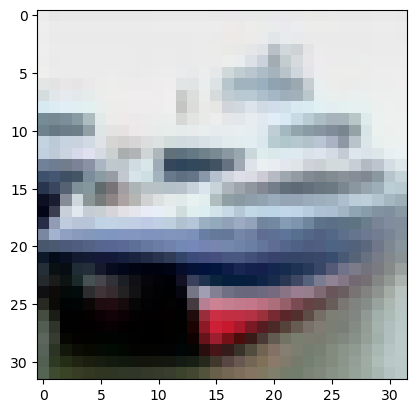

In [33]:
plt.imshow(image[1])
plt.show()

## A class for loading and processing the CIFAR-10 dataset

In [34]:
from utils import Cifar10

In [35]:
path = "../data/cifar-10-batches-py"
dataset = Cifar10(path)
train_images, train_labels = dataset.get_train()
print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000,)


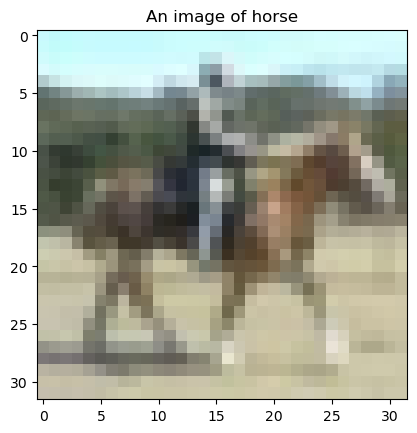

In [36]:
idx = random.randint(0, 50000)
plt.imshow(train_images[idx])
plt.title(f'An image of {dataset.label_names[train_labels[idx]]}')
plt.show()